In [1]:
#pip3 install tensorflow==1.15.2
#pip3 install joblib
#in cmd

One-Hot_Encoding

In [2]:
import re
import numpy as np
import pandas as pd
global alphabet
global maxlen
global N_LANG
N_LANG=10
maxlen=13 #max word lenght 13
alphabet = "abcdefghijklmnopqrstuvwxyzíóéáñúüäßöàèêçôùîûâìòźåãõíłęążśćńøæ" #61 different character found in 10 European different Language
def one_hot_encode(data):
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in data]
  onehot_encoded = []
  for value in integer_encoded:
    letter = np.zeros(len(alphabet))
    letter[value] = 1
    onehot_encoded.append(letter)
  while(len(onehot_encoded)<maxlen):
    letter = np.zeros(len(alphabet))
    onehot_encoded.append(letter)
  return  np.array(onehot_encoded)

def encode_labels(label):
  temp = np.zeros(N_LANG)
  temp[label-1] = 1
  return temp

def process(test_str):
  test_str=test_str.lower()
  test_str = re.sub(r'[^a-zA-Z ]', '', test_str)
  return test_str

After cleaning the data from total 100k words of each language then upload at github,total words of each language

English:-93054 words
, Danish:-96825 words
, Dutch:-96698 words
, French:-95564 words
, German:-97447 words
, Italin:-96847 words
, Polish:-98181 words
, Portuguese:-96429 words
, Spanish:-97058 words
, Swedish:-96870 words

Loading the data and then encoding the words with respect to language.

In [3]:
x=[]
y=[]
df=pd.read_csv('https://github.com/404S-retr0/HPE_Project_Grp-8/blob/main/Data_Wordlists.csv?raw=true')
for word,lang in zip(df.WORDS,df.LANGAUAGE_VECTOR):
    if(pd.isna(word)):
      continue
    if(len(word)<=maxlen):
      x.append(one_hot_encode(process(word)))
      y.append(encode_labels(int(lang)))
x=np.array(x)
print(x.shape)
y=np.array(y)
print(y.shape)

(905779, 13, 61)
(905779, 10)


In [6]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
def getmodel():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(200, input_dim=61*maxlen, activation='sigmoid'))
    model.add(Dense(150, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(N_LANG, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Getting the best model without overfitting.

In [7]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
filepath = "w.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
callbacks_list = [checkpoint,es]
modelupd=getmodel()
history=modelupd.fit(x_train,y_train, epochs=50, batch_size=500, validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 452889 samples, validate on 452890 samples
Epoch 1/50
452889/452889 [==============================] - 7s 16us/step - loss: 0.3055 - accuracy: 0.9019 - val_loss: 0.2822 - val_accuracy: 0.9044

Epoch 00001: val_accuracy improved from -inf to 0.90438, saving model to w.hdf5
Epoch 2/50
452889/452889 [==============================] - 7s 16us/step - loss: 0.2809 - accuracy: 0.9044 - val_loss: 0.2797 - val_accuracy: 0.9044

Epoch 00002: val_accuracy improved from 0.90438 to 0.90441, saving model to w.hdf5
Epoch 3/50
452889/452889 [==============================] - 7s 16us/step - loss: 0.2783 - accuracy: 0.9046 - val_loss: 0.2763 - val_accuracy: 0.9045

Epoch 00003: val_accur

Summary of Model 'modelupd'

In [8]:
modelupd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 793)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               158800    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

Model Accuracy Graph of 'modelupd'

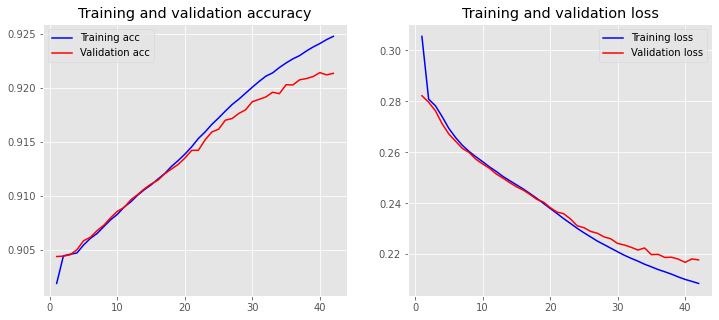

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

Saving the Model and Input Data(Non-Targeting Data)

In [10]:
# Save your model
import pickle
File = open('LDPModel.pckl','wb')
pickle.dump(modelupd,File)
File.close()

Defining text2list function

In [11]:
def text2list(text):
  import string
  import re
  test_str=text
  test_str = ''.join([i for i in test_str if not i.isdigit()]) 
  test_str=test_str.lower()
  punc = '''!()-[]{};:'"\,<>./¿?@#$%^&*_~+-=|`'''

  for ele in test_str:
    if ele in punc:
      test_str = test_str.replace(ele, "")  

  test_str_split=re.split('\s+', test_str)
  
  if (test_str_split[0]==''):
    test_str_split.remove('')
  if (test_str_split[len(test_str_split)-1]==''):
    test_str_split.remove('')

  return test_str_split

Loading the Model and defining lang_detect in percentage Distribution

In [12]:
import pickle
def lang_detect(text):
    list_of_word=text2list(text)
    k=[]
    global LangDetectModel
    LangDetectFile = open('LDPModel.pckl','rb')
    LangDetectModel = pickle.load(LangDetectFile)
    LangDetectFile.close();
    for word in list_of_word:
        k.append(one_hot_encode(process(word)))
        ans=LangDetectModel.predict(np.array(k))
    print('Predication of language belonging of each unique word from a sentence\n')
    for q in range(len(list_of_word)):
        eng=0
        dan=0
        dut=0
        fre=0
        ger=0
        ita=0
        pol=0
        por=0
        spa=0
        swe=0
        eng+=ans[q][0]
        dan+=ans[q][1]
        dut+=ans[q][2]
        fre+=ans[q][3]
        ger+=ans[q][4]
        ita+=ans[q][5]
        pol+=ans[q][6]
        por+=ans[q][7]
        spa+=ans[q][8]
        swe+=ans[q][9]
        each_word=list_of_word[q]
        print(each_word)
        report = "Percentage Distribution\nEnglish:-{}\nDanish:-{}\nDutch:-{}\nFrench:-{}\nGerman:-{}\nItalian:-{}\nPolish:-{}\nPortuguese:-{}\nSpanish:-{}\nSwedish:-{}\n".format(eng,dan,dut,fre,ger,ita,pol,por,spa,swe)
        print(report)

Running the lang_detect function as trail

In [ ]:
lang_detect('freshdirect')
lang_detect('hello @amigo , m+y name is 007. wie gehts? ¿necesitas ayuda?')